## Hypothesis 2: "A higher ICU rate gives a higher fatality rate"

- H0: A higher ICU rate does not affect the probability of fatality rate
- H1: A higher ICU rate increases the probability rate
- H2: A higher ICU rate decreases the probability rate

### Data

The data for ICU hospitilization and fatality was found from following link
 DSHS, https://dshs.texas.gov/coronavirus/additionaldata.aspx

In [2]:
# Load packages
import pandas as pd
import matplotlib.dates as mdates
import scipy.stats as stats
from scipy.stats import pearsonr
from datetime import datetime
import numpy as np
import re
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
 
 
# Load data
!rm fatalupdate.csv* icu_clean.csv*
!wget --no-check-certificate https://gitlab.tamucc.edu/6380-hypothesis-testing-assignment-3/assignment/-/raw/master/data/fatalupdate.csv
!wget --no-check-certificate https://gitlab.tamucc.edu/6380-hypothesis-testing-assignment-3/assignment/-/raw/master/data/data_icu_clean.csv
dataframef = pd.read_csv("fatalupdate.csv")
dataframeicu = pd.read_csv(r'data_icu_clean.csv')
dataframeicu

,TSA AREA,12-Apr,13-Apr,14-Apr,15-Apr,16-Apr,17-Apr,18-Apr,19-Apr,20-Apr,...,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep
0,Amarillo,4,5,5,2,6,9,5,10,6,...,22,23,22,31,34,35,35,31,35,28
1,Lubbock,12,12,14,15,14,17,16,18,17,...,39,37,34,39,40,40,33,34,40,39
2,Wichita Falls,1,0,0,0,1,0,0,0,0,...,4,6,6,6,8,8,9,9,7,9
3,Abilene,2,3,0,3,3,2,1,2,2,...,9,9,12,13,13,13,13,13,9,5
4,Dallas/Ft. Worth,161,256,150,215,224,221,190,196,188,...,215,210,215,221,195,204,215,208,201,206
5,Paris,12,11,9,8,7,7,8,9,9,...,30,26,26,29,27,26,28,24,31,32
6,Longview/Tyler,16,13,17,18,17,17,14,16,20,...,63,62,59,63,64,64,63,65,62,59
7,Lufkin,5,4,5,2,7,5,15,10,9,...,19,17,15,17,18,16,12,17,10,14
8,El Paso,6,9,6,13,10,16,18,14,19,...,46,48,45,47,44,46,48,48,51,53
9,Midland/Odessa,4,4,9,5,7,9,8,4,2,...,16,18,17,15,19,19,35,17,17,14


In [3]:
dataframef1 = pd.melt(dataframef, id_vars='TSA AREA', var_name = 'date', value_name = 'Fatility')
dataframeicu1 = pd.melt(dataframeicu, id_vars='TSA AREA', var_name = 'date', value_name = 'ICU_HOSPITILIZATION')
mergedf = dataframef1.merge(dataframeicu1, on =['TSA AREA', 'date'],how='inner')
mergedf

,TSA AREA,date,Fatility,ICU_HOSPITILIZATION
0,Amarillo,12-Apr,9,4
1,Lubbock,12-Apr,0,12
2,Wichita Falls,12-Apr,4,1
3,Abilene,12-Apr,5,2
4,Dallas/Ft. Worth,12-Apr,9,161
...,...,...,...,...
3537,Galveston,19-Sep,0,41
3538,Victoria,19-Sep,0,22
3539,Laredo,19-Sep,0,49
3540,Corpus Christi,19-Sep,0,38


### Pearson's r correlation test


In [4]:
pearsontest = pearsonr(mergedf["ICU_HOSPITILIZATION"].loc[0:3537],mergedf["Fatility"].loc[4:3541])
print(pearsontest)

(0.10522545171411862, 3.5157864401983833e-10)


### Plot result


In [5]:
dataframef

,TSA AREA,7-Mar,8-Mar,9-Mar,10-Mar,11-Mar,12-Mar,13-Mar,14-Mar,15-Mar,...,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep
0,Amarillo,0,0,0,0,0,0,0,0,0,...,10,11,3,2,6,1,0,1,0,0
1,Lubbock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Wichita Falls,0,0,0,0,0,0,0,0,0,...,6,5,2,1,4,0,0,1,0,0
3,Abilene,0,0,0,0,0,0,0,0,0,...,7,7,2,2,4,0,0,1,0,0
4,Dallas/Ft. Worth,0,0,0,0,0,0,0,0,0,...,10,11,3,2,6,1,0,1,0,0
5,Paris,0,0,0,0,0,0,0,0,0,...,4,1,1,1,1,0,0,0,0,0
6,Longview/Tyler,0,0,0,0,0,0,0,0,0,...,5,1,3,1,1,1,0,0,0,0
7,Lufkin,0,0,0,0,0,0,0,0,0,...,2,0,1,1,0,0,0,0,0,0
8,El Paso,0,0,0,0,0,0,0,0,0,...,4,0,1,2,0,0,0,0,0,0
9,Midland/Odessa,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


C:\Users\Harsh Pandya\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\Harsh Pandya\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


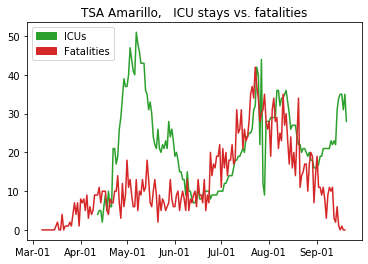

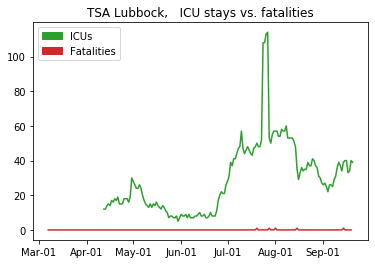

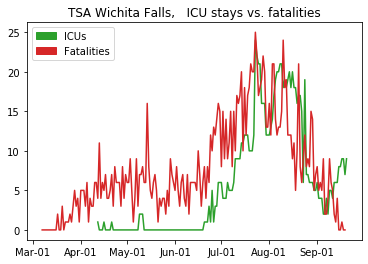

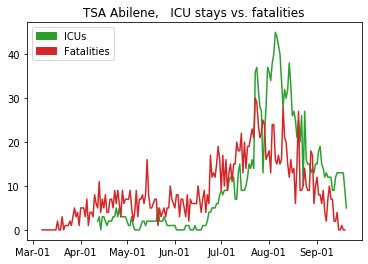

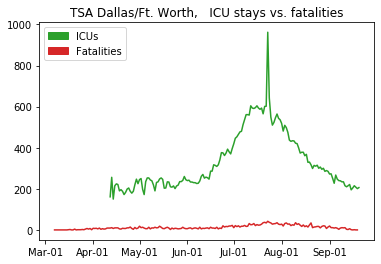

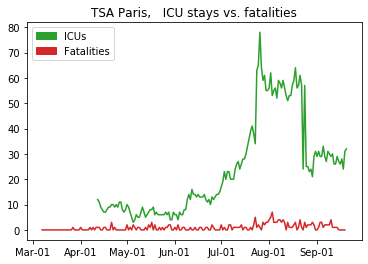

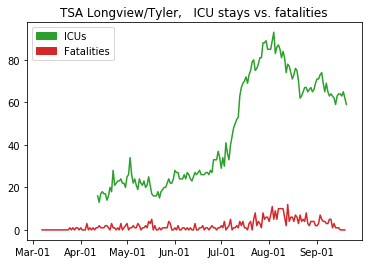

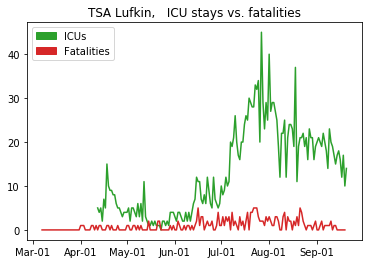

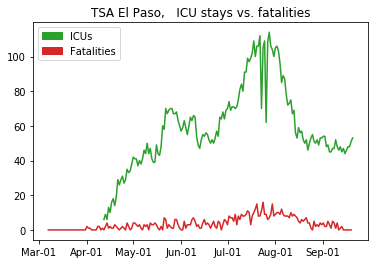

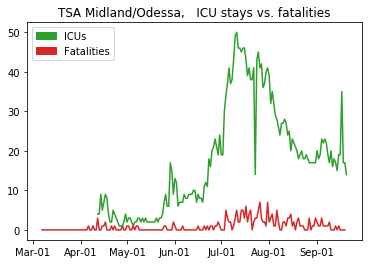

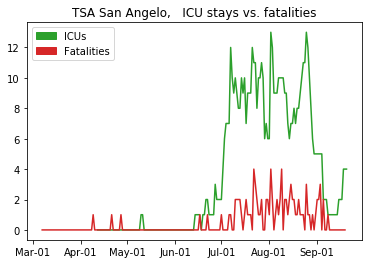

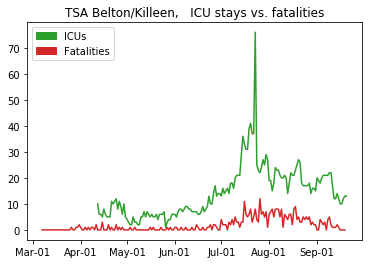

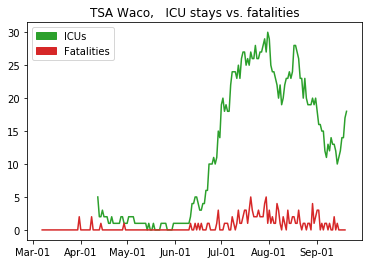

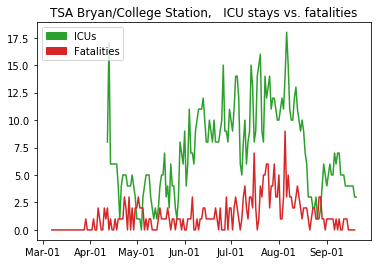

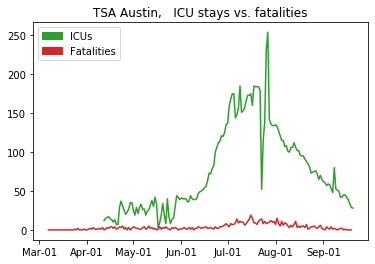

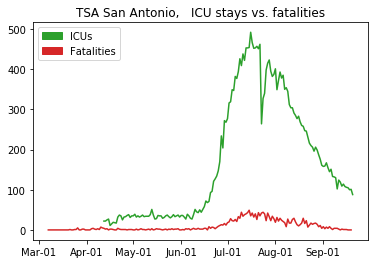

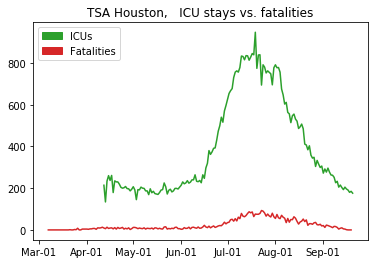

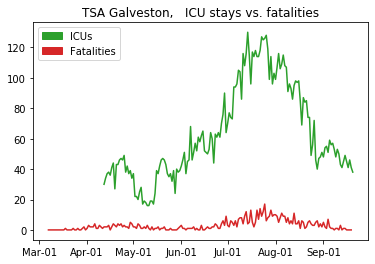

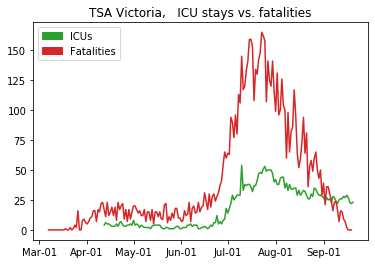

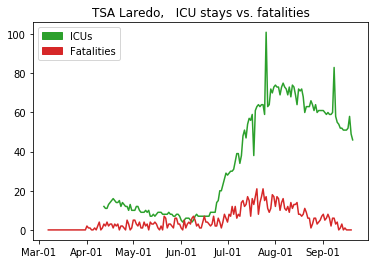

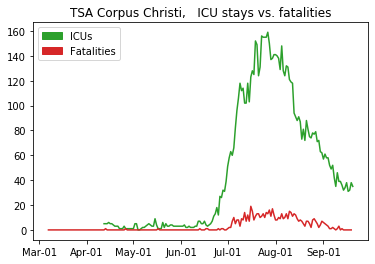

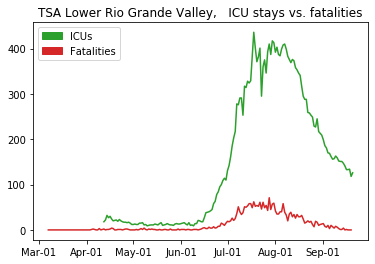

In [6]:
# visualization block
import re
import matplotlib.patches as mpatches

# Colors
colICU = "tab:green"
colF = "tab:red"
# ICU
  # Data
dfICU = dataframeicu.copy()
dfICU
dfICU.set_index('TSA AREA', inplace=True)
dfICU
dfICU_T = dfICU.T
dfICU_T
# List of TSAs
TSAs = list(dfICU_T.columns)
TSAs.pop(-1)


  # Dates
pattern = re.compile('[0-9]+-[A-Z][a-z]+', re.IGNORECASE)
datesICU = [datetime.strptime(pattern.findall(sub)[0], '%d-%b') for sub in dfICU.keys()]

# ICU
  # Data
dfF = dataframef.copy()
dfF
dfF.set_index('TSA AREA', inplace=True)
dfF
dfF_T = dfF.T
dfF_T
  # Dates
pattern = re.compile('[0-9]+-[A-Z][a-z]+', re.IGNORECASE)
datesF = [datetime.strptime(pattern.findall(sub)[0], '%d-%b') for sub in dfF.keys()]

# Legend
icuPatch = mpatches.Patch(color = colICU, label = "ICUs", linestyle = "solid")
fatalPatch = mpatches.Patch(color = colF, label = "Fatalities", linestyle = "solid")

for tsa in TSAs:
  fig, ax = plt.subplots(1)
  plt.plot(datesICU, dfICU_T[tsa], c = colICU)
  plt.plot(datesF, dfF_T[tsa], c = colF)
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
  ax.legend(loc = "upper left", handles = [icuPatch, fatalPatch])
  ax.set_title("TSA {t},   ICU stays vs. fatalities".format(t = tsa))

# Linear Regression Test

In [7]:
x = mergedf['ICU_HOSPITILIZATION'].loc[0:3537].values.reshape(-1, 1) 
y= mergedf["Fatility"].loc[4:3541].values.reshape(-1, 1) 
reg = LinearRegression().fit(x, y)
reg.score(x, y)



0.01107239568844054

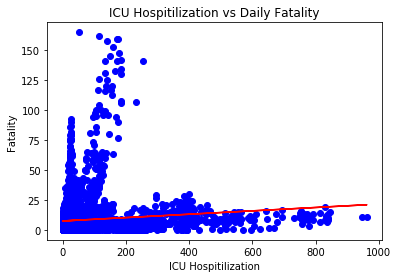

In [9]:

y_pred = reg.predict(x)
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title('ICU Hospitilization vs Daily Fatality')
plt.xlabel('ICU Hospitilization')
plt.ylabel('Fatality')
plt.show()
